# 1. Problem Statement: To predict whether a mushroom is edible or poisonous based on its physical characteristics.

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

In [132]:
filterwarnings('ignore')

# 2. Dataset extraction

In [133]:
data=pd.read_csv('train.csv')

In [134]:
data.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [135]:
data.describe()

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116941e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [137]:
data.shape

(3116945, 22)

# 3. Data Cleaning

In [138]:
data.duplicated().sum()

0

In [139]:
data.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [140]:
data.drop('id',axis=1,inplace=True)

In [141]:
data['class'].value_counts()

class
p    1705396
e    1411549
Name: count, dtype: int64

In [142]:
#changing class which is object type to binary
data['class']=data['class'].map({'p':1,'e':0})

In [143]:
#cap-diameter
data['cap-diameter'].value_counts()

cap-diameter
1.49     8164
3.18     7942
3.14     7361
1.51     7072
4.04     6828
         ... 
58.19       1
31.59       1
24.93       1
58.76       1
54.07       1
Name: count, Length: 3913, dtype: int64

In [144]:
data['cap-diameter'].describe()

count    3.116941e+06
mean     6.309848e+00
std      4.657931e+00
min      3.000000e-02
25%      3.320000e+00
50%      5.750000e+00
75%      8.240000e+00
max      8.067000e+01
Name: cap-diameter, dtype: float64

In [145]:
data['cap-diameter']=data['cap-diameter'].fillna(data['cap-diameter'].median())

In [146]:
#cap-shape
data['cap-shape'].value_counts()

cap-shape
x        1436026
f         676238
s         365146
b         318646
o         108835
          ...   
12.62          1
5.15           1
19.04          1
49.21          1
19.06          1
Name: count, Length: 74, dtype: int64

In [147]:
data['cap-shape'].unique()

array(['f', 'x', 'p', 'b', 'o', 'c', 's', 'd', 'e', 'n', nan, 'w', 'k',
       'l', '19.29', '5 f', 't', 'g', 'z', 'a', '2.85', '7 x', 'r', 'u',
       '3.55', 'is s', 'y', '4.22', '3.6', '21.56', 'i', '6 x', '24.16',
       '8', 'm', 'ring-type', '10.13', 'is p', '7.43', 'h', '0.82',
       '10.46', '2.77', '2.94', '12.62', '5.15', '19.04', '4.97', '49.21',
       'b f', '9.13', '1.66', '3.37', '7.21', '3.25', '11.12', '3 x',
       '4.3', '7.41', '6.21', '8.29', '54.78', '20.25', '3.52', '3.04',
       '2.63', '3.91', '6.44', '8.3', '7.6', '17.44', '4.33', '2.82',
       '6.53', '19.06'], dtype=object)

In [148]:
data['cap-shape']=data['cap-shape'].fillna('unknown')

In [149]:
dictionary_cap_shape={}
k=100.0
for i in data['cap-shape']:
    if i not in dictionary_cap_shape:
        if not i.replace('.', '', 1).isdigit() :
            dictionary_cap_shape[i]=k
            k+=1.0
print(dictionary_cap_shape)

{'f': 100.0, 'x': 101.0, 'p': 102.0, 'b': 103.0, 'o': 104.0, 'c': 105.0, 's': 106.0, 'd': 107.0, 'e': 108.0, 'n': 109.0, 'unknown': 110.0, 'w': 111.0, 'k': 112.0, 'l': 113.0, '5 f': 114.0, 't': 115.0, 'g': 116.0, 'z': 117.0, 'a': 118.0, '7 x': 119.0, 'r': 120.0, 'u': 121.0, 'is s': 122.0, 'y': 123.0, 'i': 124.0, '6 x': 125.0, 'm': 126.0, 'ring-type': 127.0, 'is p': 128.0, 'h': 129.0, 'b f': 130.0, '3 x': 131.0}


In [150]:
def change_cap_shape(i):
    if i in dictionary_cap_shape:
        return dictionary_cap_shape[i]
    else:
        return float(i)

In [151]:
data['cap-shape']=data['cap-shape'].apply(change_cap_shape)

In [152]:
data['cap-shape'].value_counts()

cap-shape
101.00    1436026
100.00     676238
106.00     365146
103.00     318646
104.00     108835
           ...   
12.62           1
5.15            1
19.04           1
49.21           1
19.06           1
Name: count, Length: 75, dtype: int64

In [153]:
#cap-surface
data['cap-surface'].value_counts()

cap-surface
t        460777
s        384970
y        327826
h        284460
g        263729
          ...  
1.42          1
has h         1
10.83         1
8.96          1
0.87          1
Name: count, Length: 83, dtype: int64

In [154]:
data['cap-surface'].unique()

array(['s', 'h', 'y', 'l', 't', 'e', 'g', nan, 'd', 'i', 'w', 'k',
       '15.94', 'f', 'n', 'r', 'o', 'a', 'u', 'z', '2.7', 'does l',
       '5.07', 'p', 'b', 'm', 'cap-diameter', '1.43', 'x', '7.14', 'c',
       'is h', 'does t', '0.85', '6.57', '12.79', '6.45', '4.66', '23.18',
       '3.06', '16.39', '4.21', 'veil-color', '11.78', '8.1', 'has-ring',
       'does h', '1.42', 'class', 'has h', 'does None', '10.83', 'season',
       '8.96', '14.04', '5.73', 'is None', '24.38', '2.81', '0.88',
       '2.11', '2.79', 'ring-type', 'does-bruise-or-bleed', '4.93',
       'spore-print-color', 'spore-color', '2.92', '2.51', '7.99', 'is y',
       '3.64', '3.33', '41.91', '12.2', '8.01', '9.22', '1.14', '6.49',
       '10.34', '10.1', '1.08', 'is k', '0.87'], dtype=object)

In [155]:
data['cap-surface']=data['cap-surface'].fillna('unknown')

In [156]:
dictionary_cap_surface={}
k=100.0
for i in data['cap-surface']:
    if i not in dictionary_cap_surface:
        if not i.replace('.', '', 1).isdigit() :
            dictionary_cap_surface[i]=k
            k+=1.0
print(dictionary_cap_surface)

{'s': 100.0, 'h': 101.0, 'y': 102.0, 'l': 103.0, 't': 104.0, 'e': 105.0, 'g': 106.0, 'unknown': 107.0, 'd': 108.0, 'i': 109.0, 'w': 110.0, 'k': 111.0, 'f': 112.0, 'n': 113.0, 'r': 114.0, 'o': 115.0, 'a': 116.0, 'u': 117.0, 'z': 118.0, 'does l': 119.0, 'p': 120.0, 'b': 121.0, 'm': 122.0, 'cap-diameter': 123.0, 'x': 124.0, 'c': 125.0, 'is h': 126.0, 'does t': 127.0, 'veil-color': 128.0, 'has-ring': 129.0, 'does h': 130.0, 'class': 131.0, 'has h': 132.0, 'does None': 133.0, 'season': 134.0, 'is None': 135.0, 'ring-type': 136.0, 'does-bruise-or-bleed': 137.0, 'spore-print-color': 138.0, 'spore-color': 139.0, 'is y': 140.0, 'is k': 141.0}


In [157]:
def change_cap_surface(i):
    if i in dictionary_cap_surface:
        return dictionary_cap_surface[i]
    else:
        return float(i)

In [158]:
data['cap-surface']=data['cap-surface'].apply(change_cap_surface)

In [159]:
data['cap-surface'].value_counts()

cap-surface
107.00    671023
104.00    460777
100.00    384970
102.00    327826
101.00    284460
           ...  
1.42           1
132.00         1
10.83          1
8.96           1
0.87           1
Name: count, Length: 84, dtype: int64

In [160]:
#cap-color
data['cap-color'].value_counts()

cap-color
n             1359542
y              386627
w              379442
g              210825
e              197290
               ...   
3.95                1
6.59                1
5.25                1
veil-color          1
9.02                1
Name: count, Length: 78, dtype: int64

In [161]:
data['cap-color'].unique()

array(['u', 'o', 'b', 'g', 'w', 'n', 'e', 'y', 'r', 'p', 'k', 'l', 'i',
       'h', 'd', 's', 'a', 'f', '2.05', 'season', 'c', 'x', '13', '7.72',
       'm', 'z', '6.76', '7.15', 't', 'ring-type', nan, 'class', '12.89',
       '8.83', '24.75', '22.38', '1.51', '10.1', '17.94', '3.57',
       'does n', '4.89', '6.2', '21.53', '6.41', '4.98', '3.95',
       'does-bruise-or-bleed', '6.59', '5.25', 'veil-color', '6.9',
       '5.41', '11.13', '3.11', '2.57', '17.93', '2.7', '8.57', '11.92',
       '3.08', '2.82', '4.24', '17.19', '3.34', '7', '2.9', '6.36',
       '5.91', '10.56', '26.89', '4. n', '20.62', 'stem-surface', '20.02',
       '20', '25.98', '8.67', '9.02'], dtype=object)

In [162]:
data['cap-color']=data['cap-color'].fillna('unknown')

In [163]:
dictionary_cap_color={}
k=100.0
for i in data['cap-color']:
    if i not in dictionary_cap_color:
        if not i.replace('.', '', 1).isdigit() :
            dictionary_cap_color[i]=k
            k+=1.0
print(dictionary_cap_color)

{'u': 100.0, 'o': 101.0, 'b': 102.0, 'g': 103.0, 'w': 104.0, 'n': 105.0, 'e': 106.0, 'y': 107.0, 'r': 108.0, 'p': 109.0, 'k': 110.0, 'l': 111.0, 'i': 112.0, 'h': 113.0, 'd': 114.0, 's': 115.0, 'a': 116.0, 'f': 117.0, 'season': 118.0, 'c': 119.0, 'x': 120.0, 'm': 121.0, 'z': 122.0, 't': 123.0, 'ring-type': 124.0, 'unknown': 125.0, 'class': 126.0, 'does n': 127.0, 'does-bruise-or-bleed': 128.0, 'veil-color': 129.0, '4. n': 130.0, 'stem-surface': 131.0}


In [164]:
def change_cap_color(i):
    if i in dictionary_cap_color:
        return dictionary_cap_color[i]
    else:
        return float(i)

In [165]:
data['cap-color']=data['cap-color'].apply(change_cap_color)

In [166]:
data['cap-color'].value_counts()

cap-color
105.00    1359542
107.00     386627
104.00     379442
103.00     210825
106.00     197290
           ...   
3.95            1
6.59            1
5.25            1
129.00          1
9.02            1
Name: count, Length: 79, dtype: int64

In [167]:
#does-bruise-or-bleed
data['does-bruise-or-bleed'].value_counts()

does-bruise-or-bleed
f           2569743
t            547085
w                14
c                11
h                 9
a                 7
b                 7
x                 7
y                 7
k                 6
s                 6
e                 4
l                 4
p                 4
d                 4
g                 3
z                 3
o                 3
i                 2
n                 2
r                 1
has-ring          1
3.43              1
4.42              1
2.9               1
u                 1
Name: count, dtype: int64

In [168]:
data['does-bruise-or-bleed'].unique()

array(['f', 't', 'd', 'has-ring', 'w', 'o', 'b', 'x', 'p', nan, 'g', 'y',
       'r', 'a', 'l', 'i', 'c', 'n', 'z', 's', 'k', 'h', '3.43', 'e',
       '4.42', '2.9', 'u'], dtype=object)

In [169]:
data['does-bruise-or-bleed']=data['does-bruise-or-bleed'].fillna('unknown')

In [170]:
dictionary_does_bruise={}
k=100.0
for i in data['does-bruise-or-bleed']:
    if i not in dictionary_does_bruise:
        if not i.replace('.', '', 1).isdigit() :
            dictionary_does_bruise[i]=k
            k+=1.0
print(dictionary_does_bruise)
def change_does_bruise(i):
    if i in dictionary_does_bruise:
        return dictionary_does_bruise[i]
    else:
        return float(i)
data['does-bruise-or-bleed']=data['does-bruise-or-bleed'].apply(change_does_bruise)
data['does-bruise-or-bleed'].value_counts()

{'f': 100.0, 't': 101.0, 'd': 102.0, 'has-ring': 103.0, 'w': 104.0, 'o': 105.0, 'b': 106.0, 'x': 107.0, 'p': 108.0, 'unknown': 109.0, 'g': 110.0, 'y': 111.0, 'r': 112.0, 'a': 113.0, 'l': 114.0, 'i': 115.0, 'c': 116.0, 'n': 117.0, 'z': 118.0, 's': 119.0, 'k': 120.0, 'h': 121.0, 'e': 122.0, 'u': 123.0}


does-bruise-or-bleed
100.00    2569743
101.00     547085
104.00         14
116.00         11
121.00          9
109.00          8
111.00          7
113.00          7
106.00          7
107.00          7
119.00          6
120.00          6
108.00          4
122.00          4
114.00          4
102.00          4
110.00          3
105.00          3
118.00          3
117.00          2
115.00          2
103.00          1
3.43            1
112.00          1
4.42            1
2.90            1
123.00          1
Name: count, dtype: int64

In [171]:
#gill-attachment
data['gill-attachment'].value_counts()

gill-attachment
a        646034
d        589236
x        360878
e        301858
s        295439
          ...  
1             1
is a          1
3.71          1
50.44         1
13.94         1
Name: count, Length: 78, dtype: int64

In [172]:
data['gill-attachment'].unique()

array(['a', 'x', 's', 'd', 'e', nan, 'f', 'p', 'l', 'm', 'b', '32.54',
       'n', 'g', 'i', 'u', 'does-bruise-or-bleed', 't', 'o', 'c', 'w',
       '4.64', 'k', 'r', '4.77', 'h', 'p p', '7.92', 'z', 'season', 'y',
       '8.79', 'does None', 'has f', 'ring-type', '16.33', '10.85',
       '20.07', '2.82', '7.86', '3.91', 'does', '10.23', '6.74', '0.92',
       '3.45', '1', 'is a', '3.71', '50.44', '11.62', 'has d', '1.32',
       '8.47', '6.11', '2.41', '2.54', '6.32', '19.65', '15.49', '4.01',
       '8.37', 'does f', '28.7', '13.15', '1.37', '28.15', '7.09', '9.88',
       '2.67', '18.21', '1.48', '5.93', '1.51', '16.27', '11.26', '2.79',
       'is f', '13.94'], dtype=object)

In [173]:
data['gill-attachment']=data['gill-attachment'].fillna('unknown')

In [174]:
dictionary_gill_attachment={}
k=100.0
for i in data['gill-attachment']:
    if i not in dictionary_gill_attachment:
        if not i.replace('.', '', 1).isdigit() :
            dictionary_gill_attachment[i]=k
            k+=1.0
print(dictionary_gill_attachment)
def change_gill_attachment(i):
    if i in dictionary_gill_attachment:
        return dictionary_gill_attachment[i]
    else:
        return float(i)
data['gill-attachment']=data['gill-attachment'].apply(change_gill_attachment)
data['gill-attachment'].value_counts()

{'a': 100.0, 'x': 101.0, 's': 102.0, 'd': 103.0, 'e': 104.0, 'unknown': 105.0, 'f': 106.0, 'p': 107.0, 'l': 108.0, 'm': 109.0, 'b': 110.0, 'n': 111.0, 'g': 112.0, 'i': 113.0, 'u': 114.0, 'does-bruise-or-bleed': 115.0, 't': 116.0, 'o': 117.0, 'c': 118.0, 'w': 119.0, 'k': 120.0, 'r': 121.0, 'h': 122.0, 'p p': 123.0, 'z': 124.0, 'season': 125.0, 'y': 126.0, 'does None': 127.0, 'has f': 128.0, 'ring-type': 129.0, 'does': 130.0, 'is a': 131.0, 'has d': 132.0, 'does f': 133.0, 'is f': 134.0}


gill-attachment
100.00    646034
103.00    589236
105.00    523936
101.00    360878
104.00    301858
           ...  
1.00           1
131.00         1
3.71           1
50.44          1
13.94          1
Name: count, Length: 79, dtype: int64

In [175]:
#gill-spacing
data['gill-spacing'].value_counts()

gill-spacing
c              1331054
d               407932
f               119380
e                   24
a                   17
s                   16
b                   12
x                    8
t                    8
p                    7
k                    4
g                    4
l                    3
h                    3
r                    2
6.67                 2
y                    2
0                    2
3.81                 1
1.6                  1
n                    1
1.88                 1
does f               1
4.09                 1
1.36                 1
3.24                 1
5.55                 1
5.42                 1
5.7                  1
3.62                 1
6.4                  1
24.38                1
12.27                1
1                    1
cap-surface          1
w                    1
3.57                 1
i                    1
0.73                 1
4.04                 1
5.22                 1
3.92                 1
9.01                 

In [176]:
data['gill-spacing']=data['gill-spacing'].fillna('unknown')

In [177]:
dictionary_gill_spacing={}
k=100.0
for i in data['gill-spacing']:
    if i not in dictionary_gill_spacing:
        if not i.replace('.', '', 1).isdigit() :
            dictionary_gill_spacing[i]=k
            k+=1.0
print(dictionary_gill_spacing)
def change_gill_spacing(i):
    if i in dictionary_gill_spacing:
        return dictionary_gill_spacing[i]
    else:
        return float(i)
data['gill-spacing']=data['gill-spacing'].apply(change_gill_spacing)
data['gill-spacing'].value_counts()

{'c': 100.0, 'unknown': 101.0, 'd': 102.0, 'f': 103.0, 'x': 104.0, 'b': 105.0, 'a': 106.0, 'k': 107.0, 'e': 108.0, 'y': 109.0, 'class': 110.0, 's': 111.0, 'p': 112.0, 't': 113.0, 'i': 114.0, 'w': 115.0, 'h': 116.0, 'cap-surface': 117.0, 'l': 118.0, 'r': 119.0, 'n': 120.0, 'g': 121.0, 'does f': 122.0}


gill-spacing
100.00    1331054
101.00    1258435
102.00     407932
103.00     119380
108.00         24
106.00         17
111.00         16
105.00         12
104.00          8
113.00          8
112.00          7
107.00          4
121.00          4
118.00          3
116.00          3
119.00          2
6.67            2
0.00            2
109.00          2
3.81            1
1.60            1
120.00          1
1.88            1
122.00          1
4.09            1
1.36            1
3.24            1
5.55            1
5.42            1
5.70            1
3.62            1
6.40            1
3.57            1
12.27           1
1.00            1
117.00          1
115.00          1
24.38           1
114.00          1
0.73            1
4.04            1
5.22            1
3.92            1
9.01            1
110.00          1
4.80            1
2.69            1
3.61            1
55.13           1
Name: count, dtype: int64

In [178]:
#gill-color
data['gill-color'].value_counts()

gill-color
w       931538
n       543386
y       469464
p       343626
g       212164
         ...  
9.46         1
5.01         1
3.4          1
17           1
8.37         1
Name: count, Length: 63, dtype: int64

In [179]:
data['gill-color'].unique()

array(['w', 'n', 'g', 'k', 'y', 'f', 'p', 'o', 'b', 'u', 'e', 'r', 'd',
       't', '3.45', 'z', '5', '3.39', 'season', 'h', 'x', 's', '4',
       'class', 'c', 'm', 'spacing', '0.92', nan, '18.12', 'l', 'does w',
       'a', '7.59', '8.06', '6.19', 'has-ring', '4.49', '9.46', '5.01',
       'ring-type', '3.4', 'i', '17', '10.07', 'stem-root', '20.6',
       'spore-print-color', '18.03', 'does-bruise-or-bleed', '8.83',
       'habitat', '10.21', '4.64', '6.4', 'is y', 'e y', '1.91', 'does n',
       '16.41', '6.41', 'veil-type', '20.44', '8.37'], dtype=object)

In [180]:
data['gill-color']=data['gill-color'].fillna('unknown')

In [181]:
dictionary_gill_color={}
k=100.0
for i in data['gill-color']:
    if i not in dictionary_gill_color:
        if not i.replace('.', '', 1).isdigit() :
            dictionary_gill_color[i]=k
            k+=1.0
print(dictionary_gill_color)
def change_gill_color(i):
    if i in dictionary_gill_color:
        return dictionary_gill_color[i]
    else:
        return float(i)
data['gill-color']=data['gill-color'].apply(change_gill_color)
data['gill-color'].value_counts()

{'w': 100.0, 'n': 101.0, 'g': 102.0, 'k': 103.0, 'y': 104.0, 'f': 105.0, 'p': 106.0, 'o': 107.0, 'b': 108.0, 'u': 109.0, 'e': 110.0, 'r': 111.0, 'd': 112.0, 't': 113.0, 'z': 114.0, 'season': 115.0, 'h': 116.0, 'x': 117.0, 's': 118.0, 'class': 119.0, 'c': 120.0, 'm': 121.0, 'spacing': 122.0, 'unknown': 123.0, 'l': 124.0, 'does w': 125.0, 'a': 126.0, 'has-ring': 127.0, 'ring-type': 128.0, 'i': 129.0, 'stem-root': 130.0, 'spore-print-color': 131.0, 'does-bruise-or-bleed': 132.0, 'habitat': 133.0, 'is y': 134.0, 'e y': 135.0, 'does n': 136.0, 'veil-type': 137.0}


gill-color
100.00    931538
101.00    543386
104.00    469464
106.00    343626
102.00    212164
           ...  
125.00         1
4.00           1
18.12          1
0.92           1
8.37           1
Name: count, Length: 64, dtype: int64

In [182]:
#stem-height
data['stem-height'].dtypes

dtype('float64')

In [183]:
data['stem-height'].describe()
#in this median can be used for na if exist

count    3.116945e+06
mean     6.348333e+00
std      2.699755e+00
min      0.000000e+00
25%      4.670000e+00
50%      5.880000e+00
75%      7.410000e+00
max      8.872000e+01
Name: stem-height, dtype: float64

In [184]:
#stem-width
data['stem-width'].dtype

dtype('float64')

In [185]:
data['stem-width'].describe()
#in this we can use median

count    3.116945e+06
mean     1.115379e+01
std      8.095477e+00
min      0.000000e+00
25%      4.970000e+00
50%      9.650000e+00
75%      1.563000e+01
max      1.029000e+02
Name: stem-width, dtype: float64

In [186]:
#stem-root
data['stem-root'].value_counts()

stem-root
b                    165801
s                    116946
r                     47803
c                     28592
f                       597
d                        24
y                        14
g                        12
w                        12
p                        12
k                        11
t                        10
l                        10
n                        10
x                         9
i                         8
u                         8
a                         7
e                         6
o                         5
m                         4
h                         4
z                         2
10.87                     1
13.03                     1
3.49                      1
spore-print-color         1
18.06                     1
20.0                      1
1.48                      1
3.23                      1
15.69                     1
16.88                     1
5.59                      1
2.77                      1
20.01     

In [187]:
data['stem-root']=data['stem-root'].fillna('unknown')

In [188]:
dictionary_stem_root={}
k=100.0
for i in data['stem-root']:
    if i not in dictionary_stem_root:
        if not i.replace('.', '', 1).isdigit() :
            dictionary_stem_root[i]=k
            k+=1.0
print(dictionary_stem_root)
def change_stem_root(i):
    if i in dictionary_stem_root:
        return dictionary_stem_root[i]
    else:
        return float(i)
data['stem-root']=data['stem-root'].apply(change_stem_root)
data['stem-root'].value_counts()

{'unknown': 100.0, 'b': 101.0, 'c': 102.0, 'r': 103.0, 's': 104.0, 'f': 105.0, 'y': 106.0, 'o': 107.0, 'k': 108.0, 'd': 109.0, 'n': 110.0, 'w': 111.0, 'u': 112.0, 'p': 113.0, 'x': 114.0, 'i': 115.0, 'a': 116.0, 't': 117.0, 'm': 118.0, 'l': 119.0, 'h': 120.0, 'g': 121.0, 'e': 122.0, 'z': 123.0, 'spore-print-color': 124.0}


stem-root
100.00    2757023
101.00     165801
104.00     116946
103.00      47803
102.00      28592
105.00        597
109.00         24
106.00         14
111.00         12
113.00         12
121.00         12
108.00         11
119.00         10
110.00         10
117.00         10
114.00          9
115.00          8
112.00          8
116.00          7
122.00          6
107.00          5
118.00          4
120.00          4
123.00          2
3.23            1
124.00          1
3.49            1
13.03           1
18.06           1
20.00           1
10.87           1
1.48            1
15.69           1
16.88           1
3.63            1
20.01           1
2.77            1
5.59            1
7.15            1
Name: count, dtype: int64

In [189]:
#stem-surface
data['stem-surface'].value_counts()

stem-surface
s                       327610
y                       255500
i                       224346
t                       147974
g                        78080
k                        73383
h                        28283
f                          512
w                           49
d                           48
e                           36
n                           34
x                           26
b                           23
c                           22
l                           20
p                           20
r                           20
u                           16
o                           15
a                           11
m                            7
season                       6
0.0                          3
z                            2
does-bruise-or-bleed         2
5.56                         2
10.48                        2
does s                       1
1.03                         1
7.45                         1
has h                     

In [190]:
data['stem-surface']=data['stem-surface'].fillna('unknown')

In [191]:
dictionary_stem_surface={}
k=100.0
for i in data['stem-surface']:
    if i not in dictionary_stem_surface:
        if not i.replace('.', '', 1).isdigit() :
            dictionary_stem_surface[i]=k
            k+=1.0
print(dictionary_stem_surface)
def change_stem_surface(i):
    if i in dictionary_stem_surface:
        return dictionary_stem_surface[i]
    else:
        return float(i)
data['stem-surface']=data['stem-surface'].apply(change_stem_surface)
data['stem-surface'].value_counts()

{'unknown': 100.0, 'y': 101.0, 's': 102.0, 't': 103.0, 'g': 104.0, 'h': 105.0, 'k': 106.0, 'i': 107.0, 'f': 108.0, 'l': 109.0, 'd': 110.0, 'x': 111.0, 'w': 112.0, 'a': 113.0, 'o': 114.0, 'c': 115.0, 'n': 116.0, 'm': 117.0, 'e': 118.0, 'p': 119.0, 'z': 120.0, 'b': 121.0, 'r': 122.0, 'u': 123.0, 'season': 124.0, 'class': 125.0, 'has-ring': 126.0, 'does None': 127.0, 'does s': 128.0, 'has h': 129.0, 'does-bruise-or-bleed': 130.0, 'spore-print-color': 131.0}


stem-surface
100.00    1980861
102.00     327610
101.00     255500
107.00     224346
103.00     147974
           ...   
3.89            1
4.34            1
6.58            1
12.04           1
13.94           1
Name: count, Length: 61, dtype: int64

In [192]:
#stem-color
data['stem-color'].value_counts()

stem-color
w                    1196637
n                    1003464
y                     373971
g                     132019
o                     111541
e                     103373
u                      67017
p                      54690
k                      33676
r                      22329
l                       9994
b                       7365
f                        573
s                         51
t                         40
a                         36
x                         20
i                         19
d                         16
h                         12
m                         11
c                          7
z                          6
ring-type                  3
class                      2
spore-print-color          2
is n                       1
6.31                       1
12.92                      1
3.98                       1
20.07                      1
7.7                        1
22.6                       1
6.09                       1
17.

In [193]:
data['stem-color'].unique()

array(['w', 'o', 'n', 'y', 'e', 'u', 'p', 'f', 'g', 'r', 'k', 'l', 'b',
       '3.13', 't', 'z', 'a', 'h', 'd', nan, 's', '7.33', 'is n', 'i',
       'c', 'x', 'e n', '1.75', 'm', '33.52', 'ring-type', '2.78',
       'spore-print-color', '23.59', '8.32', 'is w', '26.4', '4.75',
       '7.84', 'class', '2.75', '8.49', '4.49', '1.41', '17.45', '3.53',
       '12.92', '3.98', '20.07', '7.7', '22.6', '6.31', '6.09', '3.56',
       '3.37', '4.62', '2.54', '39.51', '18.06', '4.33'], dtype=object)

In [194]:
data['stem-color']=data['stem-color'].fillna('unknown')

In [195]:
dictionary_stem_color={}
k=100.0
for i in data['stem-color']:
    if i not in dictionary_stem_color:
        if not i.replace('.', '', 1).isdigit() :
            dictionary_stem_color[i]=k
            k+=1.0
print(dictionary_stem_color)
def change_stem_color(i):
    if i in dictionary_stem_color:
        return dictionary_stem_color[i]
    else:
        return float(i)
data['stem-color']=data['stem-color'].apply(change_stem_color)
data['stem-color'].value_counts()

{'w': 100.0, 'o': 101.0, 'n': 102.0, 'y': 103.0, 'e': 104.0, 'u': 105.0, 'p': 106.0, 'f': 107.0, 'g': 108.0, 'r': 109.0, 'k': 110.0, 'l': 111.0, 'b': 112.0, 't': 113.0, 'z': 114.0, 'a': 115.0, 'h': 116.0, 'd': 117.0, 'unknown': 118.0, 's': 119.0, 'is n': 120.0, 'i': 121.0, 'c': 122.0, 'x': 123.0, 'e n': 124.0, 'm': 125.0, 'ring-type': 126.0, 'spore-print-color': 127.0, 'is w': 128.0, 'class': 129.0}


stem-color
100.00    1196637
102.00    1003464
103.00     373971
108.00     132019
101.00     111541
104.00     103373
105.00      67017
106.00      54690
110.00      33676
109.00      22329
111.00       9994
112.00       7365
107.00        573
119.00         51
113.00         40
118.00         38
115.00         36
123.00         20
121.00         19
117.00         16
116.00         12
125.00         11
122.00          7
114.00          6
126.00          3
129.00          2
127.00          2
120.00          1
6.31            1
12.92           1
3.98            1
20.07           1
7.70            1
22.60           1
6.09            1
17.45           1
3.56            1
3.37            1
4.62            1
2.54            1
39.51           1
18.06           1
3.53            1
4.49            1
1.41            1
124.00          1
8.49            1
2.75            1
7.84            1
4.75            1
26.40           1
128.00          1
8.32            1
23.59           1
2.78            1

In [196]:
#veil-type
data['veil-type'].value_counts()

veil-type
u          159373
w              11
a               9
f               8
e               8
b               5
c               5
y               4
k               4
g               4
n               3
s               3
r               2
d               2
p               2
h               2
i               2
l               1
is None         1
t               1
21.11           1
5.94            1
Name: count, dtype: int64

In [197]:

data['veil-type']=data['veil-type'].fillna('unknown')

In [198]:
dictionary_veil_type={}
k=100.0
for i in data['veil-type']:
    if i not in dictionary_veil_type:
        if not i.replace('.', '', 1).isdigit() :
            dictionary_veil_type[i]=k
            k+=1.0
print(dictionary_veil_type)
def change_veil_type(i):
    if i in dictionary_veil_type:
        return dictionary_veil_type[i]
    else:
        return float(i)
data['veil-type']=data['veil-type'].apply(change_veil_type)
data['veil-type'].value_counts()

{'unknown': 100.0, 'u': 101.0, 'd': 102.0, 'a': 103.0, 'h': 104.0, 'g': 105.0, 'c': 106.0, 'e': 107.0, 'y': 108.0, 'i': 109.0, 'f': 110.0, 'is None': 111.0, 't': 112.0, 'w': 113.0, 'p': 114.0, 'b': 115.0, 's': 116.0, 'k': 117.0, 'r': 118.0, 'l': 119.0, 'n': 120.0}


veil-type
100.00    2957493
101.00     159373
113.00         11
103.00          9
107.00          8
110.00          8
115.00          5
106.00          5
105.00          4
108.00          4
117.00          4
120.00          3
116.00          3
114.00          2
118.00          2
102.00          2
104.00          2
109.00          2
112.00          1
111.00          1
119.00          1
21.11           1
5.94            1
Name: count, dtype: int64

In [199]:
#veil-color
data['veil-color'].value_counts()

veil-color
w       279070
y        30473
n        30039
u        14026
k        13080
e         9169
g           30
p           23
r           14
o           13
s           11
a            7
t            7
d            6
i            6
h            5
c            4
f            4
l            4
b            3
z            1
8.25         1
2.49         1
3.32         1
Name: count, dtype: int64

In [200]:
data['veil-color']=data['veil-color'].fillna('unknown')


In [201]:
dictionary_veil_color={}
k=100.0
for i in data['veil-color']:
    if i not in dictionary_veil_color:
        if not i.replace('.', '', 1).isdigit() :
            dictionary_veil_color[i]=k
            k+=1.0
print(dictionary_veil_color)
def change_veil_color(i):
    if i in dictionary_veil_color:
        return dictionary_veil_color[i]
    else:
        return float(i)
data['veil-color']=data['veil-color'].apply(change_veil_color)
data['veil-color'].value_counts()

{'unknown': 100.0, 'n': 101.0, 'w': 102.0, 'k': 103.0, 'y': 104.0, 'e': 105.0, 'u': 106.0, 'p': 107.0, 'd': 108.0, 'g': 109.0, 'r': 110.0, 'h': 111.0, 's': 112.0, 't': 113.0, 'c': 114.0, 'o': 115.0, 'i': 116.0, 'f': 117.0, 'a': 118.0, 'b': 119.0, 'l': 120.0, 'z': 121.0}


veil-color
100.00    2740947
102.00     279070
104.00      30473
101.00      30039
106.00      14026
103.00      13080
105.00       9169
109.00         30
107.00         23
110.00         14
115.00         13
112.00         11
113.00          7
118.00          7
108.00          6
116.00          6
111.00          5
114.00          4
117.00          4
120.00          4
119.00          3
8.25            1
2.49            1
121.00          1
3.32            1
Name: count, dtype: int64

In [202]:
#has-ring
data['has-ring'].value_counts()

has-ring
f             2368820
t              747982
r                  16
h                  13
c                  11
l                  11
s                  11
p                  11
g                   8
z                   6
e                   6
x                   5
m                   4
y                   3
d                   3
k                   2
o                   2
n                   2
f has-ring          1
i                   1
10.3                1
w                   1
a                   1
Name: count, dtype: int64

In [203]:
data['has-ring'].unique()

array(['f', 't', 'h', 'r', 'y', 'c', 'e', 'g', 'l', 's', nan, 'p', 'x',
       'k', 'z', 'f has-ring', 'd', 'o', 'n', 'm', 'i', '10.3', 'w', 'a'],
      dtype=object)

In [204]:
data['has-ring']=data['has-ring'].fillna('unknown')

In [205]:
dictionary_has_ring={}
k=100.0
for i in data['has-ring']:
    if i not in dictionary_has_ring:
        if not i.replace('.', '', 1).isdigit() :
            dictionary_has_ring[i]=k
            k+=1.0
print(dictionary_has_ring)
def change_has_ring(i):
    if i in dictionary_has_ring:
        return dictionary_has_ring[i]
    else:
        return float(i)
data['has-ring']=data['has-ring'].apply(change_has_ring)
data['has-ring'].value_counts()

{'f': 100.0, 't': 101.0, 'h': 102.0, 'r': 103.0, 'y': 104.0, 'c': 105.0, 'e': 106.0, 'g': 107.0, 'l': 108.0, 's': 109.0, 'unknown': 110.0, 'p': 111.0, 'x': 112.0, 'k': 113.0, 'z': 114.0, 'f has-ring': 115.0, 'd': 116.0, 'o': 117.0, 'n': 118.0, 'm': 119.0, 'i': 120.0, 'w': 121.0, 'a': 122.0}


has-ring
100.0    2368820
101.0     747982
110.0         24
103.0         16
102.0         13
105.0         11
108.0         11
109.0         11
111.0         11
107.0          8
114.0          6
106.0          6
112.0          5
119.0          4
104.0          3
116.0          3
113.0          2
117.0          2
118.0          2
115.0          1
120.0          1
10.3           1
121.0          1
122.0          1
Name: count, dtype: int64

In [206]:
#ring-type
data['ring-type'].value_counts()

ring-type
f                       2477170
e                        120006
z                        113780
l                         73443
r                         67909
p                         67678
g                         63687
m                          3992
t                            98
d                            37
n                            34
x                            32
b                            29
y                            25
s                            18
k                            18
a                            16
h                            15
w                            14
u                            13
c                            11
o                             9
ring-type                     7
i                             4
does f                        3
season                        3
15                            1
14                            1
2.87                          1
sp                            1
class                         

In [207]:
data['ring-type'].unique()

array(['f', 'z', 'e', nan, 'p', 'l', 'g', 'r', 'm', 'y', 'h', 'o', 't',
       'ring-type', 'a', 'd', 's', 'x', '4', 'b', '15', 'u', 'n', 'w',
       'does f', '3.12', 'i', 'season', 'k', 'c', 'does-bruise-or-bleed',
       '11', '23.6', '1', '14', '2', 'spore-print-color', 'class', 'sp',
       '2.87', '8.25'], dtype=object)

In [208]:
data['ring-type']=data['ring-type'].fillna('unknown')

In [209]:
dictionary_ring_type={}
k=100.0
for i in data['ring-type']:
    if i not in dictionary_ring_type:
        if not i.replace('.', '', 1).isdigit() :
            dictionary_ring_type[i]=k
            k+=1.0
print(dictionary_ring_type)
def change_ring_type(i):
    if i in dictionary_ring_type:
        return dictionary_ring_type[i]
    else:
        return float(i)
data['ring-type']=data['ring-type'].apply(change_ring_type)
data['ring-type'].value_counts()

{'f': 100.0, 'z': 101.0, 'e': 102.0, 'unknown': 103.0, 'p': 104.0, 'l': 105.0, 'g': 106.0, 'r': 107.0, 'm': 108.0, 'y': 109.0, 'h': 110.0, 'o': 111.0, 't': 112.0, 'ring-type': 113.0, 'a': 114.0, 'd': 115.0, 's': 116.0, 'x': 117.0, 'b': 118.0, 'u': 119.0, 'n': 120.0, 'w': 121.0, 'does f': 122.0, 'i': 123.0, 'season': 124.0, 'k': 125.0, 'c': 126.0, 'does-bruise-or-bleed': 127.0, 'spore-print-color': 128.0, 'class': 129.0, 'sp': 130.0}


ring-type
100.00    2477170
103.00     128880
102.00     120006
101.00     113780
105.00      73443
107.00      67909
104.00      67678
106.00      63687
108.00       3992
112.00         98
115.00         37
120.00         34
117.00         32
118.00         29
109.00         25
125.00         18
116.00         18
114.00         16
110.00         15
121.00         14
119.00         13
126.00         11
111.00          9
113.00          7
123.00          4
122.00          3
124.00          3
14.00           1
2.87            1
130.00          1
129.00          1
128.00          1
2.00            1
15.00           1
1.00            1
23.60           1
11.00           1
127.00          1
3.12            1
4.00            1
8.25            1
Name: count, dtype: int64

In [210]:
#spore-print-color
data['spore-print-color'].value_counts()

spore-print-color
k             107310
p              68237
w              50173
n              22646
r               7975
u               7256
g               3492
y                 36
s                 21
c                 16
e                 14
f                 14
t                 13
a                 13
d                  9
l                  8
b                  5
m                  4
h                  3
o                  3
x                  2
i                  2
veil-color         2
10 None            1
9 None             1
2.49               1
class              1
2.62               1
season             1
9.55               1
6.36               1
4.58               1
Name: count, dtype: int64

In [211]:
data['spore-print-color']=data['spore-print-color'].fillna('unknown')

In [212]:
dictionary_spore={}
k=100.0
for i in data['spore-print-color']:
    if i not in dictionary_spore:
        if not i.replace('.', '', 1).isdigit() :
            dictionary_spore[i]=k
            k+=1.0
print(dictionary_spore)
def change_spore(i):
    if i in dictionary_spore:
        return dictionary_spore[i]
    else:
        return float(i)
data['spore-print-color']=data['spore-print-color'].apply(change_spore)
data['spore-print-color'].value_counts()

{'unknown': 100.0, 'k': 101.0, 'w': 102.0, 'p': 103.0, 'n': 104.0, 'r': 105.0, 'u': 106.0, 'g': 107.0, 't': 108.0, 'f': 109.0, 'd': 110.0, 'l': 111.0, 'y': 112.0, 'a': 113.0, 's': 114.0, 'e': 115.0, 'o': 116.0, 'c': 117.0, 'b': 118.0, '10 None': 119.0, 'h': 120.0, 'x': 121.0, '9 None': 122.0, 'i': 123.0, 'm': 124.0, 'veil-color': 125.0, 'class': 126.0, 'season': 127.0}


spore-print-color
100.00    2849682
101.00     107310
103.00      68237
102.00      50173
104.00      22646
105.00       7975
106.00       7256
107.00       3492
112.00         36
114.00         21
117.00         16
115.00         14
109.00         14
108.00         13
113.00         13
110.00          9
111.00          8
118.00          5
124.00          4
116.00          3
120.00          3
123.00          2
125.00          2
121.00          2
122.00          1
119.00          1
2.49            1
126.00          1
2.62            1
127.00          1
9.55            1
6.36            1
4.58            1
Name: count, dtype: int64

In [213]:
#habitat
data['habitat'].value_counts()

habitat
d                       2177573
g                        454908
l                        171892
m                        150969
h                        120137
w                         18530
p                         17180
u                          5264
e                            55
s                            52
n                            41
t                            40
r                            38
y                            34
a                            34
k                            31
c                            26
b                            18
o                            12
f                            11
i                             7
x                             5
z                             5
habitat                       5
class                         3
spore-print-color             3
ring-type                     2
18.35                         1
3.68                          1
2.44                          1
1.66                          1


In [214]:
data['habitat'].unique()

array(['d', 'l', 'g', 'h', 'p', 'm', 'u', 'w', 'y', nan, 'n', 'a', 's',
       'k', 'habitat', 'z', '8.09', '17.1', 'b', 't', 'c', '9.28',
       'ring-type', 'e', 'r', 'does-bruise-or-bleed', 'f', 'is w', 'o',
       '2.94', 'x', '4', 'is h', '5.56', 'class', 'i', '10.07', '7.31',
       '5.62', 'spore-print-color', 'cap-diameter', '3.11', '16.46',
       '7.37', 'veil-type', '17.38', '1.66', '6.63', '18.35', '6.75',
       '2.44', '3.68', '2.25'], dtype=object)

In [215]:
data['habitat']=data['habitat'].fillna('unknown')

In [216]:
dictionary_habitat={}
k=100.0
for i in data['habitat']:
    if i not in dictionary_habitat:
        if not i.replace('.', '', 1).isdigit() :
            dictionary_habitat[i]=k
            k+=1.0
print(dictionary_habitat)
def change_habitat(i):
    if i in dictionary_habitat:
        return dictionary_habitat[i]
    else:
        return float(i)
data['habitat']=data['habitat'].apply(change_habitat)
data['habitat'].value_counts()

{'d': 100.0, 'l': 101.0, 'g': 102.0, 'h': 103.0, 'p': 104.0, 'm': 105.0, 'u': 106.0, 'w': 107.0, 'y': 108.0, 'unknown': 109.0, 'n': 110.0, 'a': 111.0, 's': 112.0, 'k': 113.0, 'habitat': 114.0, 'z': 115.0, 'b': 116.0, 't': 117.0, 'c': 118.0, 'ring-type': 119.0, 'e': 120.0, 'r': 121.0, 'does-bruise-or-bleed': 122.0, 'f': 123.0, 'is w': 124.0, 'o': 125.0, 'x': 126.0, 'is h': 127.0, 'class': 128.0, 'i': 129.0, 'spore-print-color': 130.0, 'cap-diameter': 131.0, 'veil-type': 132.0}


habitat
100.00    2177573
102.00     454908
101.00     171892
105.00     150969
103.00     120137
107.00      18530
104.00      17180
106.00       5264
120.00         55
112.00         52
109.00         45
110.00         41
117.00         40
121.00         38
111.00         34
108.00         34
113.00         31
118.00         26
116.00         18
125.00         12
123.00         11
129.00          7
126.00          5
115.00          5
114.00          5
128.00          3
130.00          3
119.00          2
18.35           1
6.75            1
6.63            1
3.11            1
1.66            1
17.38           1
132.00          1
2.44            1
3.68            1
7.37            1
16.46           1
9.28            1
7.31            1
131.00          1
5.62            1
10.07           1
5.56            1
127.00          1
4.00            1
2.94            1
124.00          1
122.00          1
8.09            1
17.10           1
2.25            1
Name: count, dtype: int64

In [217]:
#season
data['season'].value_counts()

season
a    1543321
u    1153588
w     278189
s     141847
Name: count, dtype: int64

In [218]:
#replace with a for missing value if exist
data['season']=data['season'].map({'a':0,'u':1,'w':2,'s':3})

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 int64  
 1   cap-diameter          float64
 2   cap-shape             float64
 3   cap-surface           float64
 4   cap-color             float64
 5   does-bruise-or-bleed  float64
 6   gill-attachment       float64
 7   gill-spacing          float64
 8   gill-color            float64
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             float64
 12  stem-surface          float64
 13  stem-color            float64
 14  veil-type             float64
 15  veil-color            float64
 16  has-ring              float64
 17  ring-type             float64
 18  spore-print-color     float64
 19  habitat               float64
 20  season                int64  
dtypes: float64(19), int64(2)
memory usage: 499.4 MB


In [220]:
# for float values using scaling
float_col=[]
for col in data.columns:
    if data[col].dtypes=='float64':
        float_col.append(col)
for i in float_col:
    mini=data[i].min()
    maxi=data[i].max()
    diff=maxi-mini
    #for i in range(len(data[col])):
    data[i]=(data[i]-mini)/diff
            

# 4. Data Analysis

In [222]:
co=data.corr()

In [223]:
co['class'].sort_values(ascending=False)

class                   1.000000
cap-surface             0.187044
stem-color              0.119317
stem-surface            0.106536
spore-print-color       0.099315
stem-root               0.092926
cap-color               0.085972
cap-shape               0.066585
gill-color              0.063412
has-ring                0.048613
veil-type               0.047178
habitat                 0.031005
veil-color             -0.000288
does-bruise-or-bleed   -0.035366
stem-height            -0.049740
gill-spacing           -0.076003
ring-type              -0.077347
season                 -0.109473
gill-attachment        -0.131313
cap-diameter           -0.162626
stem-width             -0.169807
Name: class, dtype: float64

In [224]:
df=data.drop('class',axis=1)
target=data['class']

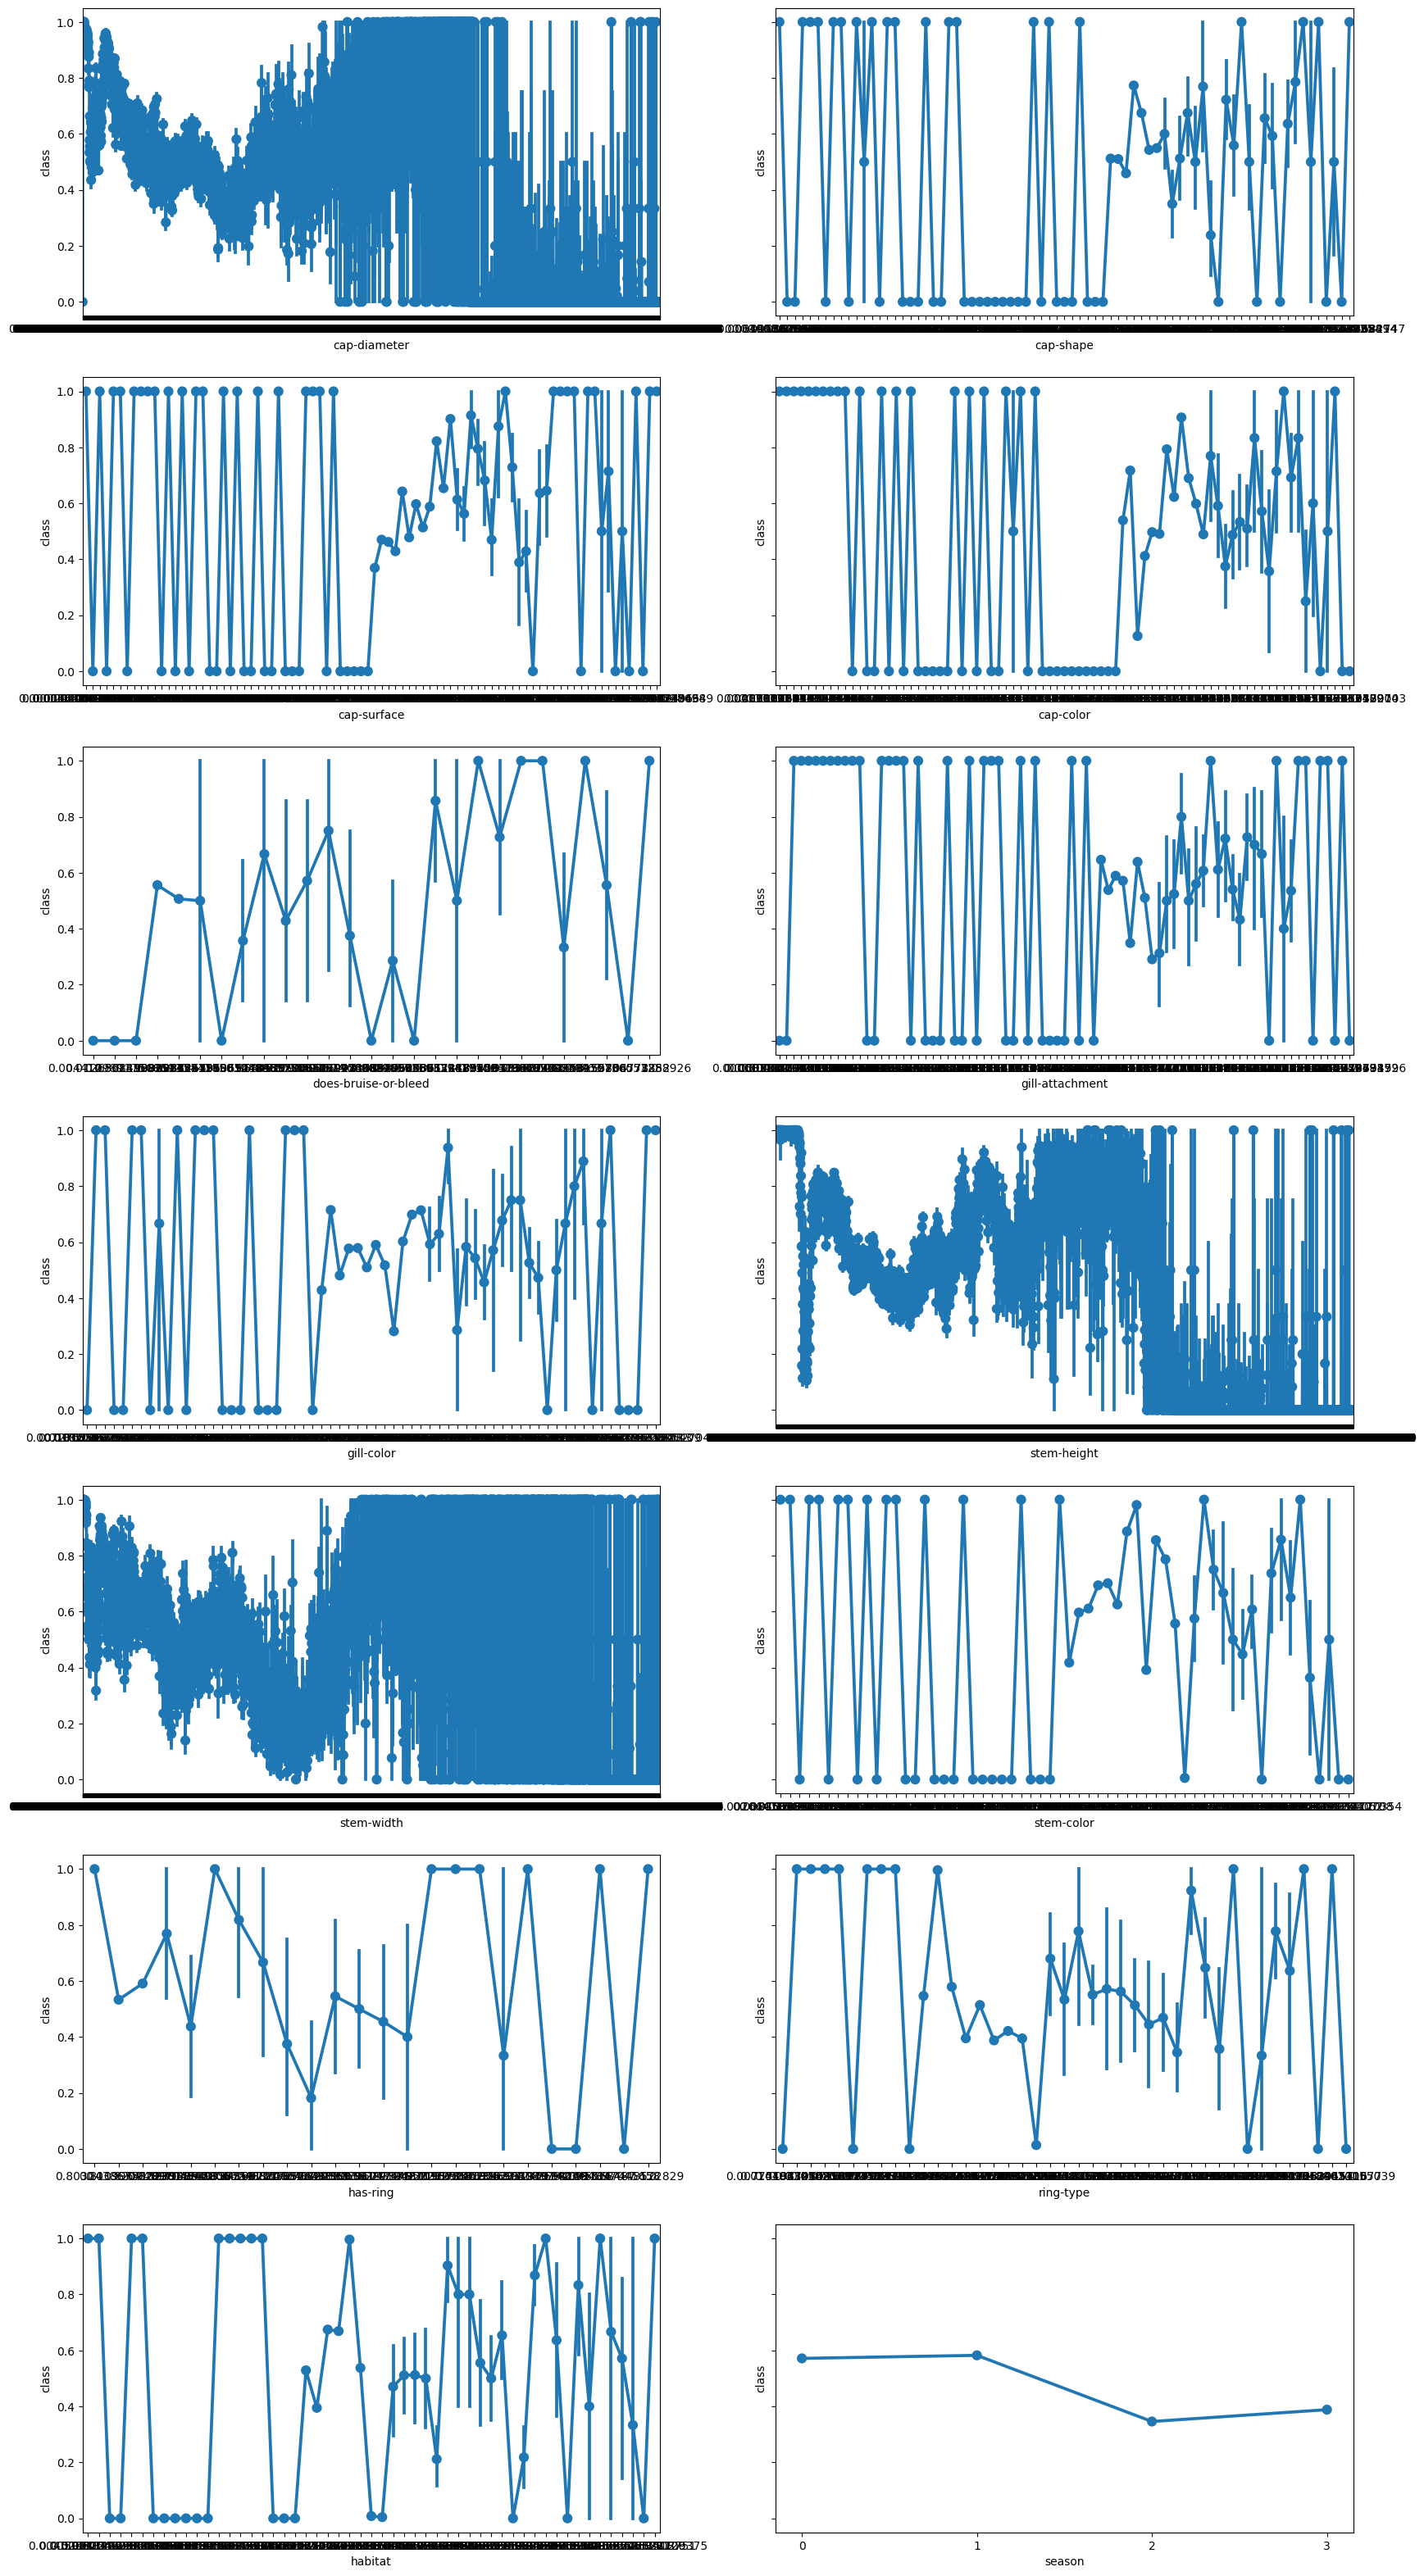

In [88]:

fig, axes = plt.subplots(7, 2, figsize=(20, 40), sharey=True) 
k=0
for i in range(7):
    for j in range(2):
        sns.pointplot(x=df.columns[k],y=target,data=data,ax=axes[i][j])
        plt.plot()
        k+=1


[]

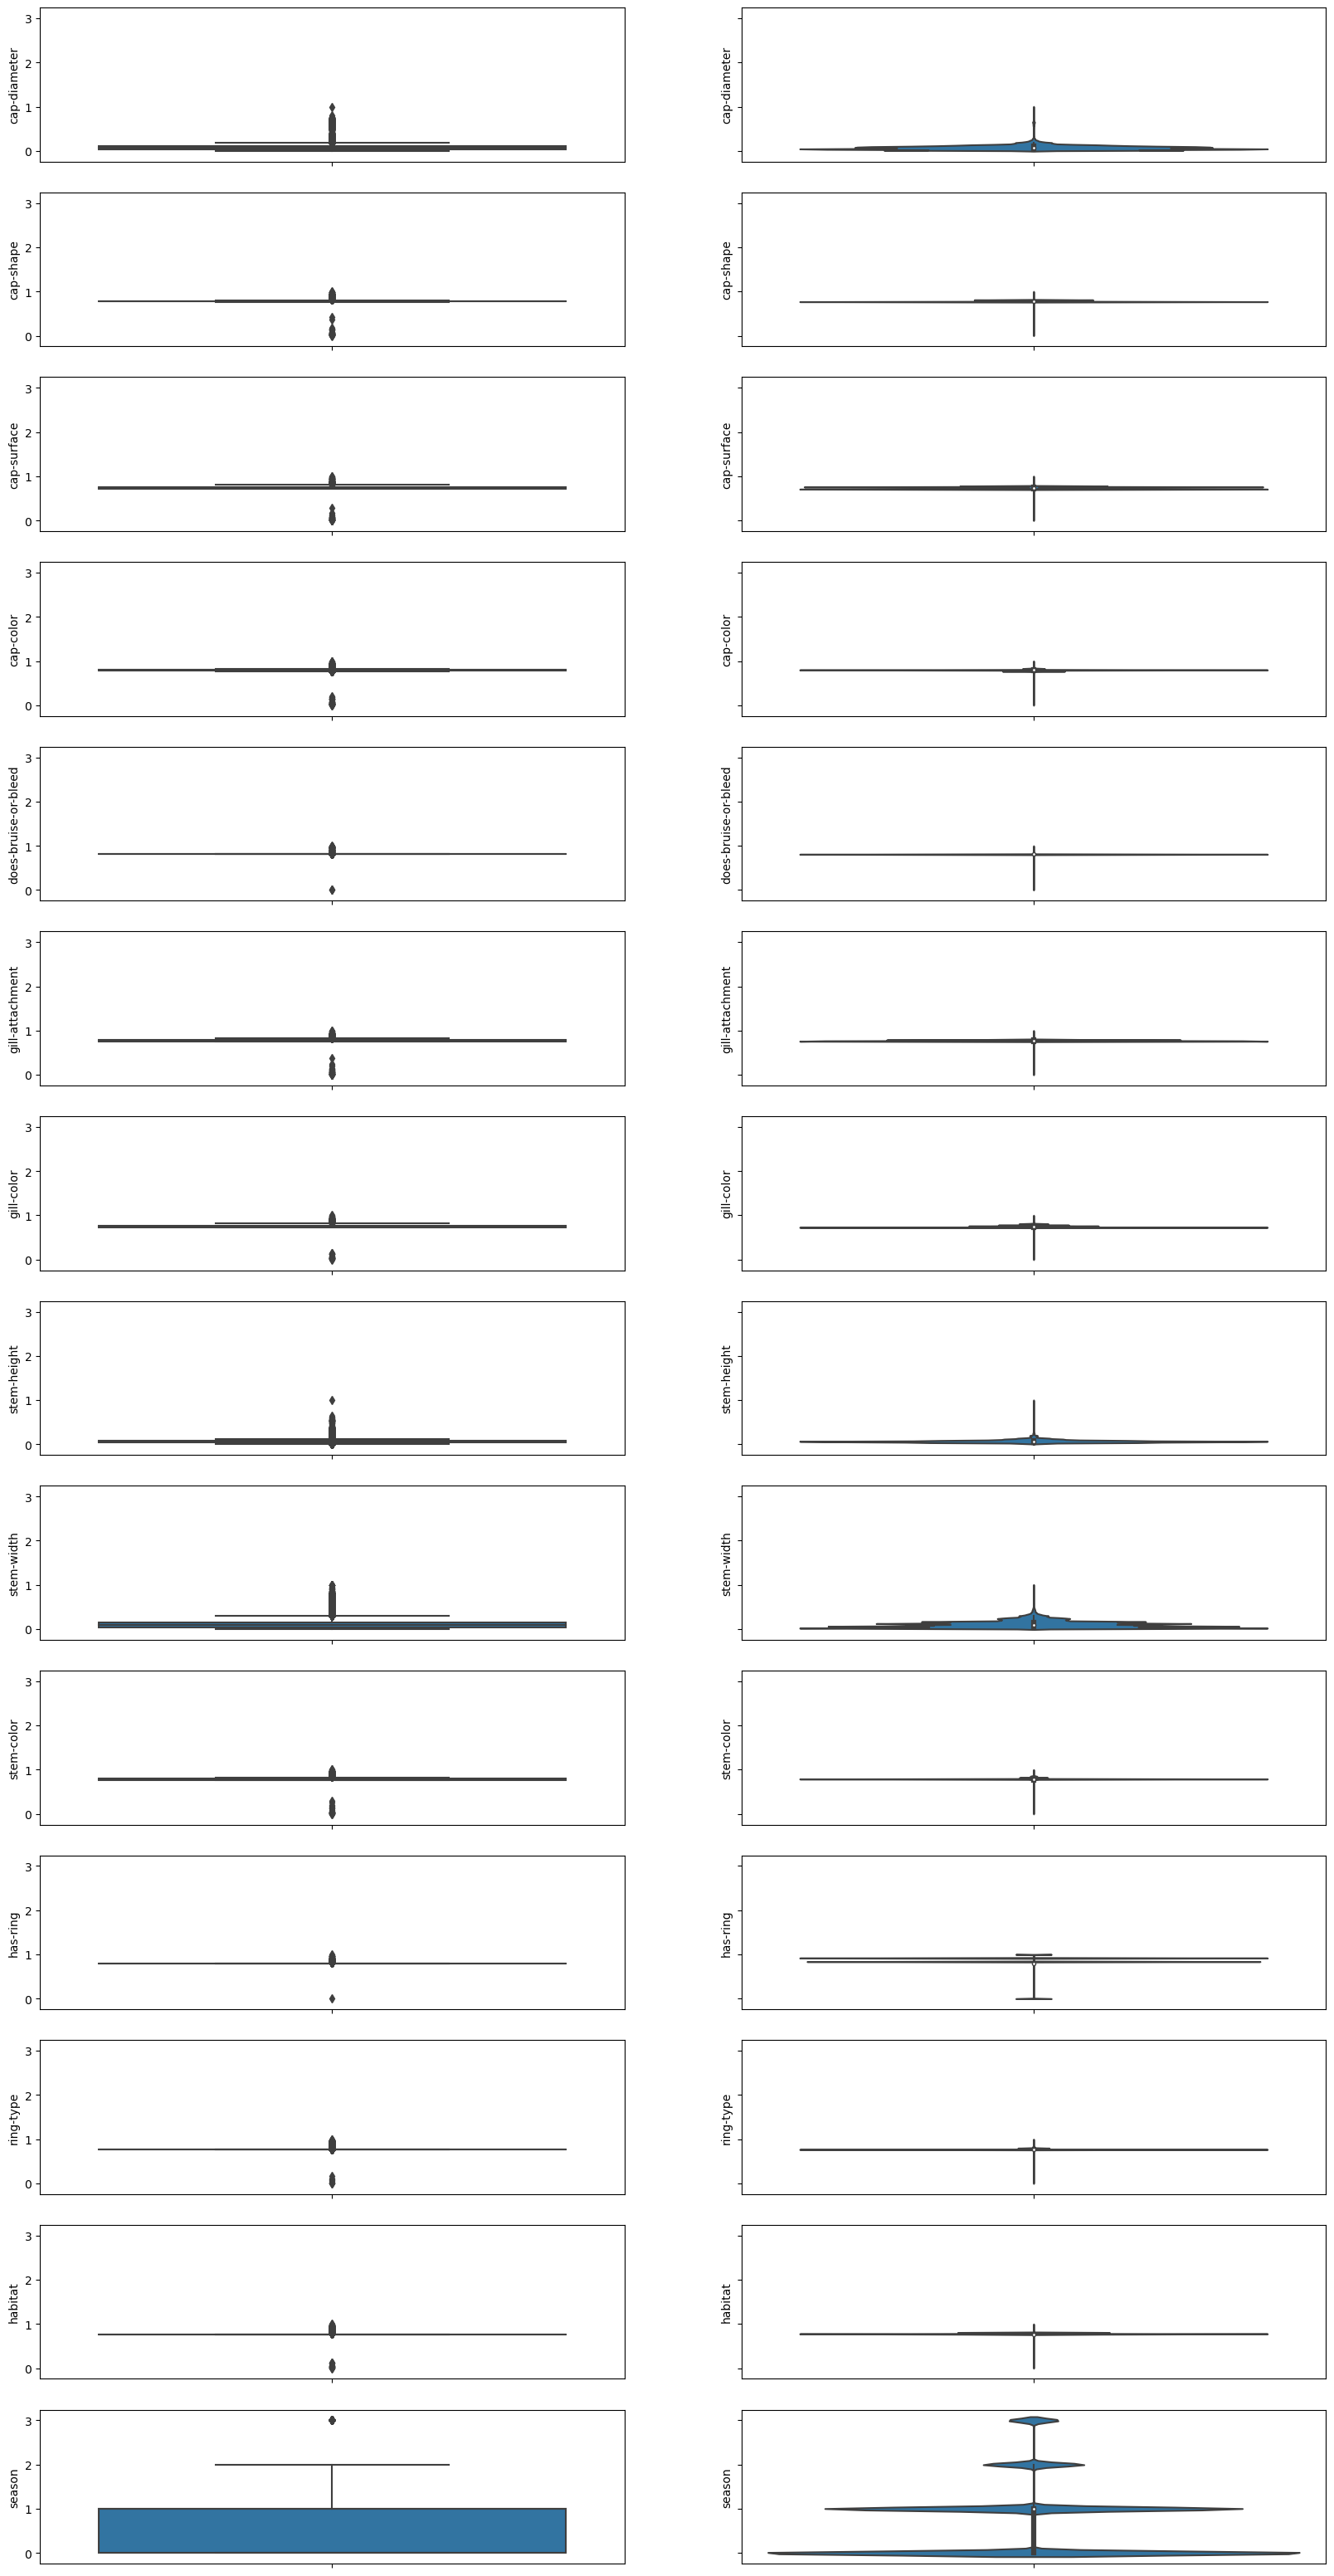

In [89]:
#box plot for outliers
fig, axes = plt.subplots(14, 2, figsize=(20, 40), sharey=True)
k=0
for i in range(14):
    sns.boxplot(y=df.columns[i],data=df,ax=axes[i][0])
    sns.violinplot(y=df.columns[i],data=df,ax=axes[i][1])
plt.plot()

# 5. Feature Engineering

In [225]:
#outliers can be seen in all the coloumns present in data so we use iqr technique to remove the outliers
import numpy as np
for col in df.columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    maximum=q3+iqr*1.5
    minimum=q1-iqr*1.5
    
    df[col]=np.where(df[col]>=maximum , df[col].median(),df[col])
    df[col]=np.where(df[col]<=minimum , df[col].median(),df[col])
    

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             float64
 2   cap-surface           float64
 3   cap-color             float64
 4   does-bruise-or-bleed  float64
 5   gill-attachment       float64
 6   gill-spacing          float64
 7   gill-color            float64
 8   stem-height           float64
 9   stem-width            float64
 10  stem-root             float64
 11  stem-surface          float64
 12  stem-color            float64
 13  veil-type             float64
 14  veil-color            float64
 15  has-ring              float64
 16  ring-type             float64
 17  spore-print-color     float64
 18  habitat               float64
 19  season                float64
dtypes: float64(20)
memory usage: 475.6 MB


In [92]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3116945 entries, 0 to 3116944
Series name: class
Non-Null Count    Dtype
--------------    -----
3116945 non-null  int64
dtypes: int64(1)
memory usage: 23.8 MB


In [227]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,target,test_size=0.2,random_state=42)

# 6. Model Training


In [228]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def check(model):
    y_pred=model.predict(x_test)
    print("Accuracy score= ",accuracy_score(y_pred,y_test))
    print("Confusion matrix= ")
    print(confusion_matrix(y_pred,y_test))
    print('classification report= ')
    print(classification_report(y_pred,y_test))

In [95]:
from sklearn.dummy import DummyClassifier
check(DummyClassifier().fit(x_train,y_train))

Accuracy score=  0.5469971398276197
Confusion matrix= 
[[     0      0]
 [282397 340992]]
classification report= 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.55      0.71    623389

    accuracy                           0.55    623389
   macro avg       0.50      0.27      0.35    623389
weighted avg       1.00      0.55      0.71    623389



In [96]:
from sklearn.linear_model import LogisticRegression
check(LogisticRegression().fit(x_train,y_train))

Accuracy score=  0.673842496418769
Confusion matrix= 
[[167517  88443]
 [114880 252549]]
classification report= 
              precision    recall  f1-score   support

           0       0.59      0.65      0.62    255960
           1       0.74      0.69      0.71    367429

    accuracy                           0.67    623389
   macro avg       0.67      0.67      0.67    623389
weighted avg       0.68      0.67      0.68    623389



In [97]:
from sklearn.linear_model import LogisticRegressionCV
check(LogisticRegressionCV().fit(x_train,y_train))

Accuracy score=  0.6754626725848547
Confusion matrix= 
[[171604  91520]
 [110793 249472]]
classification report= 
              precision    recall  f1-score   support

           0       0.61      0.65      0.63    263124
           1       0.73      0.69      0.71    360265

    accuracy                           0.68    623389
   macro avg       0.67      0.67      0.67    623389
weighted avg       0.68      0.68      0.68    623389



In [98]:
from sklearn.naive_bayes import BernoulliNB
check(BernoulliNB().fit(x_train,y_train))

Accuracy score=  0.5469971398276197
Confusion matrix= 
[[     0      0]
 [282397 340992]]
classification report= 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.55      0.71    623389

    accuracy                           0.55    623389
   macro avg       0.50      0.27      0.35    623389
weighted avg       1.00      0.55      0.71    623389



In [99]:
from sklearn.naive_bayes import MultinomialNB
check(MultinomialNB().fit(x_train,y_train))

Accuracy score=  0.5744438865620022
Confusion matrix= 
[[ 36352  19242]
 [246045 321750]]
classification report= 
              precision    recall  f1-score   support

           0       0.13      0.65      0.22     55594
           1       0.94      0.57      0.71    567795

    accuracy                           0.57    623389
   macro avg       0.54      0.61      0.46    623389
weighted avg       0.87      0.57      0.66    623389



In [100]:
from sklearn.neighbors import KNeighborsClassifier
check(KNeighborsClassifier().fit(x_train,y_train))

Accuracy score=  0.9845585982428308
Confusion matrix= 
[[278010   5239]
 [  4387 335753]]
classification report= 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    283249
           1       0.98      0.99      0.99    340140

    accuracy                           0.98    623389
   macro avg       0.98      0.98      0.98    623389
weighted avg       0.98      0.98      0.98    623389



In [101]:
from sklearn.tree import DecisionTreeClassifier
check(DecisionTreeClassifier().fit(x_train,y_train))

Accuracy score=  0.977526071201128
Confusion matrix= 
[[275430   7043]
 [  6967 333949]]
classification report= 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    282473
           1       0.98      0.98      0.98    340916

    accuracy                           0.98    623389
   macro avg       0.98      0.98      0.98    623389
weighted avg       0.98      0.98      0.98    623389



In [102]:
from sklearn.tree import ExtraTreeClassifier
check(ExtraTreeClassifier().fit(x_train,y_train))

Accuracy score=  0.976204264111173
Confusion matrix= 
[[275005   7442]
 [  7392 333550]]
classification report= 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    282447
           1       0.98      0.98      0.98    340942

    accuracy                           0.98    623389
   macro avg       0.98      0.98      0.98    623389
weighted avg       0.98      0.98      0.98    623389



In [103]:
from sklearn.ensemble import AdaBoostClassifier
check(AdaBoostClassifier().fit(x_train,y_train))

Accuracy score=  0.7611234718610691
Confusion matrix= 
[[202483  68999]
 [ 79914 271993]]
classification report= 
              precision    recall  f1-score   support

           0       0.72      0.75      0.73    271482
           1       0.80      0.77      0.79    351907

    accuracy                           0.76    623389
   macro avg       0.76      0.76      0.76    623389
weighted avg       0.76      0.76      0.76    623389



In [104]:
from sklearn.ensemble import BaggingClassifier
check(BaggingClassifier().fit(x_train,y_train))

Accuracy score=  0.985618931357467
Confusion matrix= 
[[278663   5231]
 [  3734 335761]]
classification report= 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    283894
           1       0.98      0.99      0.99    339495

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



In [105]:
from sklearn.ensemble import GradientBoostingClassifier
check(GradientBoostingClassifier().fit(x_train,y_train))

Accuracy score=  0.864919015253718
Confusion matrix= 
[[243275  45086]
 [ 39122 295906]]
classification report= 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85    288361
           1       0.87      0.88      0.88    335028

    accuracy                           0.86    623389
   macro avg       0.86      0.86      0.86    623389
weighted avg       0.86      0.86      0.86    623389



In [106]:
from sklearn.ensemble import HistGradientBoostingClassifier
check(HistGradientBoostingClassifier().fit(x_train,y_train))

Accuracy score=  0.9791799341983898
Confusion matrix= 
[[276503   7085]
 [  5894 333907]]
classification report= 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    283588
           1       0.98      0.98      0.98    339801

    accuracy                           0.98    623389
   macro avg       0.98      0.98      0.98    623389
weighted avg       0.98      0.98      0.98    623389



In [229]:
from sklearn.ensemble import RandomForestClassifier
check(RandomForestClassifier().fit(x_train,y_train))

Accuracy score=  0.9907264966176818
Confusion matrix= 
[[279782   3166]
 [  2615 337826]]
classification report= 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    282948
           1       0.99      0.99      0.99    340441

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



In [230]:
ml_model=RandomForestClassifier().fit(x_train,y_train)

In [109]:
import keras_tuner
import keras
def build_model(hp):

    model = keras.models.Sequential()

    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(
        units = hp.Int("units", min_value = 32, max_value = 512, step = 32),
        kernel_initializer=hp.Choice("kernel_initializer", ["he_normal", "he_uniform"]),
        activation = hp.Choice("activation", ["elu", "relu", "leaky_relu", "selu", "tanh"]),
        
    ))
    
    model.add(keras.layers.Dense(
        units = hp.Int("units", min_value = 32, max_value = 256, step = 32),
        kernel_initializer=hp.Choice("kernel_initializer", ["he_normal", "he_uniform"]),
        activation = hp.Choice("activation", ["elu", "relu", "leaky_relu", "selu", "tanh"]),
        
    ))

    if hp.Boolean("dropout"):
        model.add(keras.layers.Dropout(rate = hp.Float("rate", min_value = .25, max_value = .70)))

    model.add(keras.layers.Dense(2, activation = "sigmoid"))

    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")


    model.compile(
        loss = "sparse_categorical_crossentropy", 
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate),
        metrics = ["accuracy"]
    )
    return model

In [110]:
tuner = keras_tuner.RandomSearch(
    hypermodel = build_model,
    objective = "val_accuracy",
    max_trials = 3,
    executions_per_trial=2
)

Reloading Tuner from .\untitled_project\tuner0.json


In [111]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
kernel_initializer (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform'], 'ordered': False}
activation (Choice)
{'default': 'elu', 'conditions': [], 'values': ['elu', 'relu', 'leaky_relu', 'selu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
rate (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.25, 'max_value': 0.7, 'step': None, 'sampling': 'linear'}


In [112]:
tuner.search(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Trial 3 Complete [17h 35m 25s]
val_accuracy: 0.9520764648914337

Best val_accuracy So Far: 0.9520764648914337
Total elapsed time: 1d 07h 20m 40s


In [118]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [119]:
best_hps.get('units')

256

In [125]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/20
62339/62339 [==============================] - 250s 4ms/step - loss: 0.6047 - accuracy: 0.6690 - val_loss: 0.5473 - val_accuracy: 0.7172
Epoch 2/20
62339/62339 [==============================] - 251s 4ms/step - loss: 0.5537 - accuracy: 0.7124 - val_loss: 0.5252 - val_accuracy: 0.7421
Epoch 3/20
62339/62339 [==============================] - 244s 4ms/step - loss: 0.5255 - accuracy: 0.7295 - val_loss: 0.4744 - val_accuracy: 0.7692
Epoch 4/20
62339/62339 [==============================] - 253s 4ms/step - loss: 0.5053 - accuracy: 0.7420 - val_loss: 0.4703 - val_accuracy: 0.7463
Epoch 5/20
62339/62339 [==============================] - 265s 4ms/step - loss: 0.4863 - accuracy: 0.7554 - val_loss: 0.4348 - val_accuracy: 0.7786
Epoch 6/20
62339/62339 [==============================] - 255s 4ms/step - loss: 0.4713 - accuracy: 0.7660 - val_loss: 0.4723 - val_accuracy: 0.7470
Epoch 7/20
62339/62339 [==============================] - 254s 4ms/step - loss: 0.4535 - accuracy: 0.7782 - val_

In [126]:
history.history

{'loss': [0.6046609878540039,
  0.5537431836128235,
  0.5255263447761536,
  0.5053228735923767,
  0.4862915277481079,
  0.4713265597820282,
  0.4535406231880188,
  0.43242040276527405,
  0.40961572527885437,
  0.3930702209472656,
  0.3837222158908844,
  0.37584561109542847,
  0.3687223792076111,
  0.36324307322502136,
  0.35709619522094727,
  0.35103166103363037,
  0.34373190999031067,
  0.3379305303096771,
  0.3315327763557434,
  0.32782435417175293],
 'accuracy': [0.6690197587013245,
  0.7123544216156006,
  0.7294665575027466,
  0.7419968843460083,
  0.7553678154945374,
  0.7660493850708008,
  0.7782312631607056,
  0.7943027019500732,
  0.8113135695457458,
  0.8233385682106018,
  0.8297932147979736,
  0.8348477482795715,
  0.8397092819213867,
  0.8431786894798279,
  0.8473825454711914,
  0.8510770797729492,
  0.8555917143821716,
  0.8591433763504028,
  0.8629240989685059,
  0.8650406002998352],
 'val_loss': [0.5472959876060486,
  0.5252045392990112,
  0.4743552505970001,
  0.47027668

# 7. Saving result

In [231]:
test=pd.read_csv('test.csv')

In [232]:
test.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [233]:
col=[]
for i in df.columns:
    col.append(i)

In [234]:
t_data=test[col]

In [235]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             object 
 2   cap-surface           object 
 3   cap-color             object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-spacing          object 
 7   gill-color            object 
 8   stem-height           float64
 9   stem-width            float64
 10  stem-root             object 
 11  stem-surface          object 
 12  stem-color            object 
 13  veil-type             object 
 14  veil-color            object 
 15  has-ring              object 
 16  ring-type             object 
 17  spore-print-color     object 
 18  habitat               object 
 19  season                object 
dtypes: float64(3), object(17)
memory usage: 317.1+ MB


In [260]:
t_data.isnull().sum()

cap-diameter                  0
cap-shape                     0
cap-surface                   0
cap-color                     0
does-bruise-or-bleed          0
gill-attachment               0
gill-spacing                  0
gill-color                    0
stem-height                   0
stem-width                    0
stem-root                     0
stem-surface                  0
stem-color                    0
veil-type                     0
veil-color              1826124
has-ring                      0
ring-type                     0
spore-print-color       1899617
habitat                       0
season                        0
dtype: int64

In [237]:
#preprocessing  all data 
t_data['cap-diameter']=t_data['cap-diameter'].fillna(data['cap-diameter'].median())



      

In [238]:
t_data['cap-shape']=t_data['cap-shape'].fillna('unknown')


for i in range(len(t_data['cap-shape'])):
    if not t_data['cap-shape'][i] in dictionary_cap_shape:
        if not t_data['cap-shape'][i].replace('.', '', 1).isdigit() :
            t_data['cap-shape'][i]='unknown'
            
t_data['cap-shape']=t_data['cap-shape'].apply(change_cap_shape)  

In [239]:

t_data['cap-surface']=t_data['cap-surface'].fillna('unknown')

for i in range(len(t_data['cap-surface'])):
    if not t_data['cap-surface'][i] in dictionary_cap_surface:
        if not t_data['cap-surface'][i].replace('.', '', 1).isdigit() :
            t_data['cap-surface'][i]='unknown'
t_data['cap-surface']=t_data['cap-surface'].apply(change_cap_surface)


In [240]:
t_data['cap-color']=t_data['cap-color'].fillna('unknown')

for i in range(len(t_data['cap-color'])):
    if not t_data['cap-color'][i] in dictionary_cap_color:
        if not t_data['cap-color'][i].replace('.', '', 1).isdigit() :
            t_data['cap-color'][i]='unknown'
t_data['cap-color']=t_data['cap-color'].apply(change_cap_color)


In [241]:
t_data['does-bruise-or-bleed']=t_data['does-bruise-or-bleed'].fillna('unknown')

for i in range(len(t_data['does-bruise-or-bleed'])):
    if not t_data['does-bruise-or-bleed'][i] in dictionary_does_bruise:
        if not t_data['does-bruise-or-bleed'][i].replace('.', '', 1).isdigit() :
            t_data['does-bruise-or-bleed'][i]='unknown'
            
t_data['does-bruise-or-bleed']=t_data['does-bruise-or-bleed'].apply(change_does_bruise)

In [242]:
t_data['gill-attachment']=t_data['gill-attachment'].fillna('unknown')

for i in range(len(t_data['gill-attachment'])):
    if not t_data['gill-attachment'][i] in dictionary_gill_attachment:
        if not  t_data['gill-attachment'][i].replace('.', '', 1).isdigit() :
             t_data['gill-attachment'][i]='unknown'
t_data['gill-attachment']=t_data['gill-attachment'].apply(change_gill_attachment)

In [243]:
t_data['gill-color']=t_data['gill-color'].fillna('unknown')

for i in range(len(t_data['gill-color'])):
    if not t_data['gill-color'][i] in dictionary_gill_color:
        if not t_data['gill-color'][i].replace('.', '', 1).isdigit() :
            t_data['gill-color'][i]='unknown'
t_data['gill-color']=t_data['gill-color'].apply(change_gill_color)


In [244]:
t_data['stem-color']=t_data['stem-color'].fillna('unknown')

for i in range(len(t_data['stem-color'])):
    if not t_data['stem-color'][i] in dictionary_stem_color:
        if not t_data['stem-color'][i].replace('.', '', 1).isdigit() :
            t_data['stem-color'][i]='unknown'
t_data['stem-color']=t_data['stem-color'].apply(change_stem_color)

In [245]:
t_data['has-ring']=t_data['has-ring'].fillna('unknown')

for i in range(len(t_data['has-ring'])):
    if not t_data['has-ring'][i] in dictionary_has_ring:
        if not t_data['has-ring'][i].replace('.', '', 1).isdigit() :
            t_data['has-ring'][i]='unknown'
t_data['has-ring']=t_data['has-ring'].apply(change_has_ring)


In [246]:
t_data['ring-type']=t_data['ring-type'].fillna('unknown')

for i in range(len(t_data['ring-type'])):
    if not t_data['ring-type'][i] in dictionary_ring_type:
        if not t_data['ring-type'][i].replace('.', '', 1).isdigit() :
            t_data['ring-type'][i]='unknown'
t_data['ring-type']=t_data['ring-type'].apply(change_ring_type)

In [247]:
t_data['habitat']=t_data['habitat'].fillna('unknown')

for i in range(len(t_data['habitat'])):
    if not t_data['habitat'][i] in dictionary_habitat:
        if not t_data['habitat'][i].replace('.', '', 1).isdigit() :
            t_data['habitat'][i]='unknown'
t_data['habitat']=t_data['habitat'].apply(change_habitat)

In [248]:
t_data['season']=t_data['season'].map({'a':0,'u':1,'w':2,'s':3})

In [249]:
t_data['stem-height']=t_data['stem-height'].fillna(data['stem-height'].median())

In [253]:
t_data['gill-spacing']=t_data['gill-spacing'].fillna('unknown')

for i in range(len(t_data['gill-spacing'])):
    if not t_data['gill-spacing'][i] in dictionary_gill_spacing:
        if not  t_data['gill-spacing'][i].replace('.', '', 1).isdigit() :
             t_data['gill-spacing'][i]='unknown'
t_data['gill-spacing']=t_data['gill-spacing'].apply(change_gill_spacing)

In [255]:
t_data['stem-root']=t_data['stem-root'].fillna('unknown')

for i in range(len(t_data['stem-root'])):
    if not t_data['stem-root'][i] in dictionary_stem_root:
        if not t_data['stem-root'][i].replace('.', '', 1).isdigit() :
            t_data['stem-root'][i]='unknown'
t_data['stem-root']=t_data['stem-root'].apply(change_stem_root)

In [257]:
t_data['stem-surface']=t_data['stem-surface'].fillna('unknown')

for i in range(len(t_data['stem-surface'])):
    if not t_data['stem-surface'][i] in dictionary_stem_surface:
        if not t_data['stem-surface'][i].replace('.', '', 1).isdigit() :
            t_data['stem-surface'][i]='unknown'
t_data['stem-surface']=t_data['stem-surface'].apply(change_stem_surface)

In [259]:
t_data['veil-type']=t_data['veil-type'].fillna('unknown')

for i in range(len(t_data['veil-type'])):
    if not t_data['veil-type'][i] in dictionary_veil_type:
        if not t_data['veil-type'][i].replace('.', '', 1).isdigit() :
            t_data['veil-type'][i]='unknown'
t_data['veil-type']=t_data['veil-type'].apply(change_veil_type)

In [261]:
t_data['veil-color']=t_data['veil-color'].fillna('unknown')

for i in range(len(t_data['veil-color'])):
    if not t_data['veil-color'][i] in dictionary_veil_color:
        if not t_data['veil-color'][i].replace('.', '', 1).isdigit() :
            t_data['veil-color'][i]='unknown'
t_data['veil-color']=t_data['veil-color'].apply(change_veil_color)

In [262]:
t_data['spore-print-color']=t_data['spore-print-color'].fillna('unknown')

for i in range(len(t_data['spore-print-color'])):
    if not t_data['spore-print-color'][i] in dictionary_spore:
        if not t_data['spore-print-color'][i].replace('.', '', 1).isdigit() :
            t_data['spore-print-color'][i]='unknown'
t_data['spore-print-color']=t_data['spore-print-color'].apply(change_spore)

In [263]:
for i in float_col:
    mini=t_data[i].min()
    maxi=t_data[i].max()
    diff=maxi-mini
    t_data[i]=(t_data[i]-mini)/diff
    
  

In [265]:
import numpy as np
for col in t_data.columns:
  
    
    t_data[col]=np.where(t_data[col]>=maximum , data[col].median(),t_data[col])
    t_data[col]=np.where(t_data[col]<=minimum , data[col].median(),t_data[col])

predict=model.predict(t_data)
predict = np.argmax(predict, axis = -1)

test['class']=predict

In [266]:
test['class']=ml_model.predict(t_data)

In [267]:
test['class'].value_counts()

class
1    1325814
0     752150
Name: count, dtype: int64

In [268]:
test['class']=test['class'].map({1:'p',0:'e'})

In [269]:
test['class'].value_counts()

class
p    1325814
e     752150
Name: count, dtype: int64

In [270]:
res={'id':test['id'],'class':test['class']}

In [271]:
dt=pd.DataFrame(res)

In [273]:
dt.to_csv('res.csv',index=False)